# IMEC2001 Herramientas Computacionales 
## Clase 3 - Derivación e integración simbólica

---

## TABLA DE CONTENIDO


- 1. Concepto de objeto
- 2. Cargar Librerías sympy
- 3. Objeto symbol
- 4. Operaciones matemáticas y expresiones simbólicas
- 5. Diferenciación
- 6. Integración
- 7. Evaluación numérica

<a id="section1"></a>
# Sección 1: OOP(Oriented Object Programming)

## 1. Concepto de Objeto

Un objeto es una collección de variables y métodos.
Estas variables y métodos se definen a través de una 'clase' que especifica la descripción de los objetos que comparten un mismo tipo.

In [1]:
class Estudiante:
    nombre = ""
    apellido = ""
    cursoFavorito= ""
    calculosVistos=[]

Esta clase definió unicamente variables para un estudiante

In [2]:
#Podemos crear un objeto de tipo estudiante:
juan=Estudiante()
type(juan)

__main__.Estudiante

In [3]:
#Podemos extender la clase Estudiante para incluir methodos.
#El método init es el "constructor" de la clase, el cual nos sirve  para construir nuevos objetos del tipo Estudiante
# a través de pasar algunos argumentos.
class Estudiante:
    nombre = ""
    apellido = ""
    cursoFavorito= ""
    promedio=0

    def __init__(self,nombre,apellido,cursoFavorito,promedio):
        self.nombre=nombre
        self.apellido=apellido
        self.cursoFavorito=cursoFavorito
        self.promedio=promedio

    def saluda(self):
        print('hola, mi nombre es {} {}, mi curso favorito es {}'.format(self.nombre,self.apellido,self.cursoFavorito))
    
    def validarExtracreditacion(self):
        #Los métodos de una clase también pueden generar retornos
        if self.promedio>=4.0:
            return True
        else:
            return False

juan=Estudiante('Juan','Lopez','Herramientas Computacionales',3.8)
ana=Estudiante('Jonathan','Camargo','Soft Robotics',4.1)
juan.saluda()
ana.saluda()
print("Juan puede ver extracreditos: {}".format(juan.validarExtracreditacion()))
print("Ana puede ver extracreditos: {}".format(ana.validarExtracreditacion()))

hola, mi nombre es Juan Lopez, mi curso favorito es Herramientas Computacionales
hola, mi nombre es Jonathan Camargo, mi curso favorito es Soft Robotics
Juan puede ver extracreditos: False
Ana puede ver extracreditos: True


Casi todas las librerías que utilizan en python están hechas a partir de clases ("class") definiendo variables y métodos internos a la clase. Por ejemplo la librería sympy que utilizaremos a continuación.

## 2. Cargar Librería sympy

## Primero instalar sympy 

Por ejemplo, en el terminal puede usar el comando:

```terminal
conda install sympy
```


In [4]:
import sympy
from sympy import symbols
# Utilizaremos symbols el cual es una función que nos permite crear objetos para álgebra simbólica

## 3. Objeto symbol

In [6]:
#Creamos una variable simbólica 'a' y una variable 'b'
a=symbols('a')
b=symbols('b')

#Podemos construir expresiones a partir de los simbolos a y b
expr=a+b


#Manipular expresiones operando
expr**2

In [7]:
#Manipular expresiones substituyendo variables por otra expresión
expr.subs({a:b**-1})

b + 1/b

In [16]:
pi = sympy.pi
x = symbols('x')
expr = sympy.sin(2*x) + sympy.cos(2*x)
expr.evalf(subs={x:pi/4})

1.00000000000000

Vea toda la documentación de sympy <a href="https://docs.sympy.org/latest/tutorials/intro-tutorial/features.html">aqui</a>

## 4. Operaciones matemáticas y expresiones simbólicas

Continuemos creando expresiones y manipulandolas

In [11]:
from sympy import sin,cos

#Podemos crear varios simbolos a la vez
[theta,alpha,r_1,r_2]=symbols('theta,alpha,r_1,r_2')

expr1=r_1*sin(theta)
expr2=r_2*cos(theta)

expr3=expr1**2+expr2**2
expr3

r_1**2*sin(theta)**2 + r_2**2*cos(theta)**2

In [12]:
#Que pasa si r1=r2?
expr3.subs({r_1:r_2})

r_2**2*sin(theta)**2 + r_2**2*cos(theta)**2

In [13]:
#El sistema CAS reemplaza la variable, pero claramente podríamos simplificar
expr4=expr3.subs({r_1:r_2})
expr4.simplify()

r_2**2

In [14]:
#Esto lo podríamos hacer sin asignar una nueva variable expr4
expr3.subs({r_1:r_2}).simplify()

r_2**2

## 5. Diferenciación simbólica

In [15]:
#Podemos encontrar la derivada de una expresión respecto a la variable de interés
expr=r_1*sin(theta+alpha)
expr

r_1*sin(alpha + theta)

In [16]:
expr.diff(r_1)

sin(alpha + theta)

In [17]:
expr.diff(alpha)

r_1*cos(alpha + theta)

In [18]:
#A veces las variables en las expresiones pueden ser implicitamente función de otras.
# Esto ocurre por ejemplo en sistemas dinámicos muchas variables son función del tiempo.
# Para esto no se definen como symbol sino como funciones:

from sympy import Function

t=symbols('t')
x=Function('x')

expr=x(t)
expr

x(t)

In [19]:
# Podemos crear expresiones más complicadas
3*x(t)**2+2*x(t)+1

3*x(t)**2 + 2*x(t) + 1

In [20]:
# Podemos derivar respecto al simbolo t. Observe que diff aplica la regla de la cadena y aparecen términos dx/dt
expr=3*x(t)**2+2*x(t)+1
expr.diff(t)

6*x(t)*Derivative(x(t), t) + 2*Derivative(x(t), t)

## 6. Integración simbólica

In [21]:
#La función es integrate. Pero observe que no añade una constante de integración y el usuario tendría que añadir ese término si es necesario
expr=r_1*sin(theta)
sympy.integrate(expr,theta)

-r_1*cos(theta)

In [22]:
#Podemos hacer integrales definidas
expr=r_1*sin(theta)
aa=sympy.integrate(expr,(theta,0,sympy.pi))
aa

2*r_1

## 7. Evaluación numérica

(-1.0, 1.0)

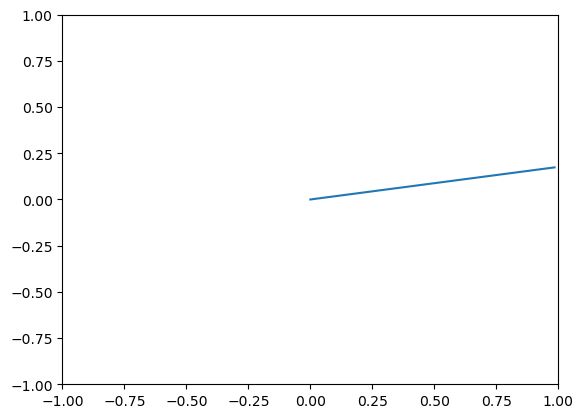

In [34]:
import numpy as np
import matplotlib.pyplot as plt

# Una vez se tienen expresiones simbólicas se puede evaluar reemplazando valores para las variables
expr1=r_1*cos(theta)
expr2=r_1*sin(theta)

# Pruebe cambiar el angulo por otros valores
valores=[(r_1,1),(theta,np.deg2rad(10))]

p=[expr1.subs(valores),expr2.subs(valores)]

plt.plot([0,p[0]],[0,p[1]])
plt.xlim([-1,1])
plt.ylim([-1,1])

In [36]:
# Una forma más clara es convertir expresiones simbólicas en funciones que retornan un valor numérico

expr1=r_1*cos(theta)
expr2=r_1*sin(theta)


def punto(r_1_numeric,theta_numeric):
    valores=[(r_1,r_1_numeric),(theta,theta_numeric)]
    p=[expr1.subs(valores),expr2.subs(valores)]
    return p

punto(1,np.deg2rad(10))

[0.984807753012208, 0.173648177666930]

De esta manera solo llamamos la función punto cada vez que queremos evaluar la expresión


In [319]:
# Sympy ya tiene incorporado un método para crear estas funciones y hacer la substitución más eficientemente.
# Lambdify crea funciones que reciben los argumentos numericos y evalúa la substitución.

expr1=r_1*cos(theta)

expr1_fun=sympy.lambdify([r_1,theta],expr1)

expr1_fun(1,np.deg2rad(10))

0.984807753012208

In [320]:
expr1=r_1*cos(theta)
expr2=r_1*sin(theta)

expr1_fun=sympy.lambdify([r_1,theta],expr1)
expr2_fun=sympy.lambdify([r_1,theta],expr2)

(-1.0, 1.0)

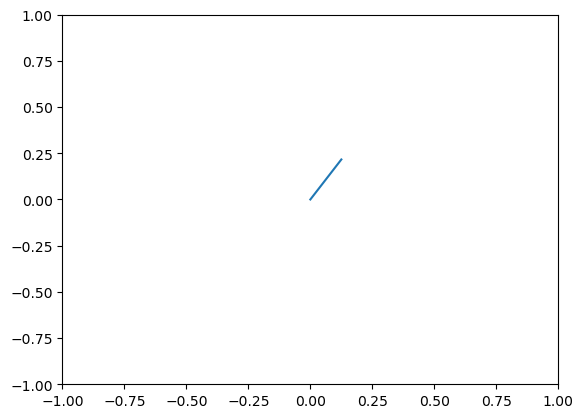

In [321]:
angulo=60
radio=0.25
p=[expr1_fun(radio,np.deg2rad(angulo)),expr2_fun(radio,np.deg2rad(angulo))]
plt.plot([0,p[0]],[0,p[1]])
plt.xlim([-1,1])
plt.ylim([-1,1])

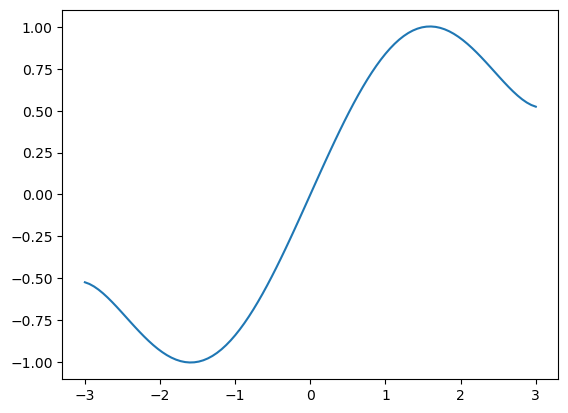

In [322]:
# También se puede configurar sympy para que se puedan evaluar muchos valores al tiempo de nuestra función
x=symbols("x")
y=x - x**3/6 + x**5/120 # Dato curioso: Estos son los primeros 3 términos de la serie de taylor de seno. 

y_func=sympy.lambdify(x,y,"numpy") #Se ingresa como primer término la variable que queremos hacer lambdify, después la función, y por último numpy 

#Lo anterior nos permite ingresar sets de datos como inputs y evaluar muchos datos al tiempo

xx=np.linspace(-3,3,100) #Todos los datos que queremos evaluar, en este caso evaluamos 100 datos desde -3 hasta 3
yy=y_func(xx) #Se crea un set de soluciones

plt.plot(xx,yy)


